<a href="https://colab.research.google.com/github/valesierrai/Analitica-de-Negocios/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargamos Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargamos la Base de Datos

In [ ]:
XDB=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/5. Taller 4 - BD MCAS.xlsx',sheet_name=0)
XDB=XDB[['Score','STR','TSAL','INC','SGL']]
XDB=XDB.dropna()

#Se cargan los datos en bruto
XD=np.array(XDB[['STR','TSAL','INC','SGL']])
yd=np.array(XDB[['Score']])

#Procedemos con la Normalización
XDn=XD/np.max(XD,axis=0) #Axis=0 busca el max por columnas
ydn=(1/(np.max(yd)-np.min(yd)))*(yd-np.min(yd))

**Modelo ADALINE** Este modelo busca el pronóstico del Score para un grupo de solicitantes de crédito

2. Procedemos a implementar nuestro primer modelo neuronal-ADALINE (Adaptive Linear)

In [ ]:
NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales

model.add(Dense(1, activation='linear', use_bias=False, input_dim=NE))
model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydn, epochs=1000, batch_size=100)
ys=model.predict(XDn)

Epoch 1/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.1846
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1768
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1731
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.1697
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.1660
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1627
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1595
Epoch 9/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.1563
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1533
Epoch 11/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.1504
Epoch 12/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1475
Epoch 13/1000
3/3 [==============================

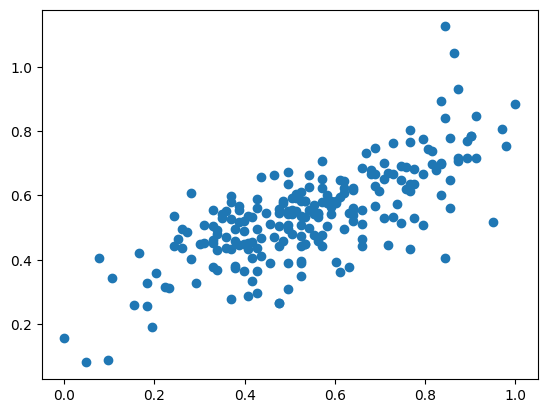

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydn,ys)))
df.corr()

,0,1
0,1.000000,0.735535
1,0.735535,1.000000


In [ ]:
#Efectos Independientes
W=model.layers[0].get_weights()

[array([[ 0.1937889 ],
        [ 0.18798345],
        [ 0.89163435],
        [-0.44102928]], dtype=float32)]

<Figure size 640x480 with 0 Axes>

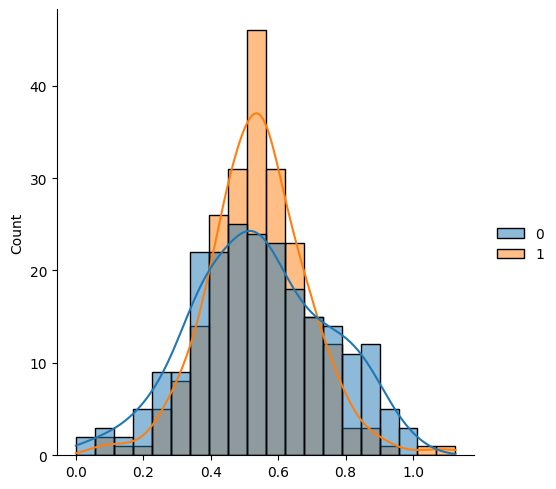

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys.flatten()),kde=True)
plt.show()

**Modelo MADALINE**

3. Procedemos a implementar el Modelo MADALINE (Multi-Adaptive Linear)

In [ ]:
NE=4 #Definimos número de entradas
model=Sequential() #Cortex Cerebrales
model.add(Dense(10, activation='linear', use_bias=False, input_dim=NE))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse')  #Mean Square Error  #Adam= la regla en descenso
history=model.fit(XDn,ydn, epochs=1000, batch_size=100)
ys1=model.predict(XDn)

Epoch 1/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6324
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5756
Epoch 3/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.5221
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.4719
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4253
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3819
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3413
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3051
Epoch 9/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2711
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2408
Epoch 11/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2137
Epoch 12/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1890
Epoch 13/1000
3/3 [==============================

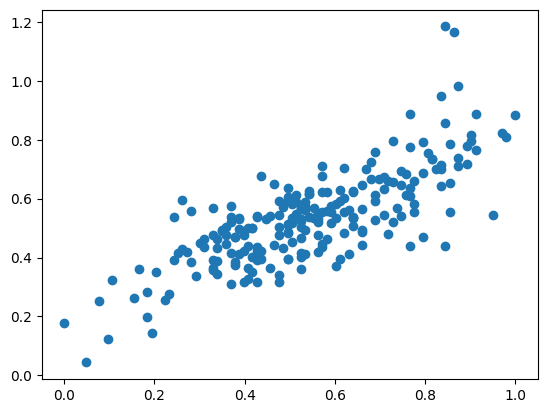

In [ ]:
#Gráfico de Dispersión
plt.figure()
plt.scatter(ydn,ys1)
plt.show()

In [ ]:
#Matriz de Correlación
df=pd.DataFrame(np.column_stack((ydn,ys1)))
df.corr()

,0,1
0,1.000000,0.773153
1,0.773153,1.000000


In [ ]:
#Efectos Independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]

np.dot(W2,C2)

array([[-0.2317158 ],
       [ 0.20886728],
       [ 0.9746471 ],
       [-0.3671289 ]], dtype=float32)

<Figure size 640x480 with 0 Axes>

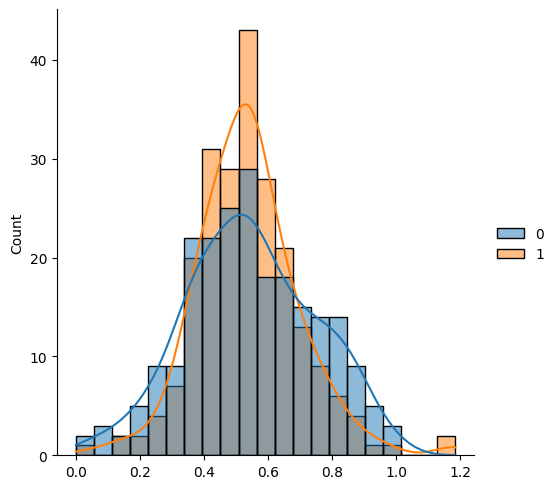

In [ ]:
#Como son las distribuciones de los datos
plt.figure()
sns.displot((ydn.flatten(),ys1.flatten()),kde=True)
plt.show()

4. Informe para personas que poseen el valor MCAS.

In [ ]:
XDB1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Negocios/5. Taller 4 - BD MCAS.xlsx',sheet_name=1)
XDB1=XDB1[['Score','STR','TSAL','INC','SGL']]
XDB1=XDB1.dropna()

#Se cargan los datos en bruto
XD1=np.array(XDB1[['STR','TSAL','INC','SGL']])
yd1=np.array(XDB1[['Score']])

#Procedemos con la Normalización
XDn1=XD1/np.max(XD1,axis=0) #Axis=0 busca el max por columnas
ydn1=(1/(np.max(yd1)-np.min(yd1)))*(yd1-np.min(yd1))

In [ ]:
ys1=model.predict(XDn1)*np.max(yd)
dfpredict=pd.DataFrame(ys1)
dfpredict.to_excel("Informe_Predict.Personas.xlsx")

l=len(np.where(np.mean(ys1)>=ys1)[0])

print("Los datos que estan por encima de la media son",l)

1/1 [==============================] - 0s 36ms/step
Los datos que estan por encima de la media son 9


5. Preguntas

**a. ¿Cuál es el modelo que logró el error cuadrático medio más bajo durante la fase de aprendizaje?**
**R/** El modelo que logró un error cuadrático medio más bajo es el MADALINE (0.0162).
**b. ¿Cuál fue el modelo que tuvo el mejor comportamiento frente al coeficiente de correlación?**
**R/** El modelo que tuvo el mejor comportamiento frente al coeficiente de correlación es el MADALINE (0.773153). Mientras que el ADALINE tuvo un 0.735535.
**c. ¿Cuál es el modelo que logró más rápidamente la estabilización del aprendizaje?**
**R/** El modelo que se estabilizo más rápido fue el MADALINE.
**d. ¿Cuáles son las variables que lograron los efectos independientes negativos? **
**R/** STR con -0.2317158 y SGL con -0.3671289
**e. ¿Cuál fue la variable que lograr el efecto independiente más alto en magnitud?**
**R/** INC con  0.9746471
**f. Llevar a cabo la construcción de un informe para las personas que aún no poseen el valor MCAS.**
**R/** Los datos que estan por encima de la media son 9
**g. Determinar cuáles de las personas que hacen parte de este informe alcanzaron valores que estuvieron por encima de la media, esto con el fin de llevar a cabo un proceso de contacto para su inscripción.**
**R/** Realizado en excel
**h. El informe anterior se debe crear mediante la metodología de DataFrames en pandas y su interoperabilidad de operaciones con Excel. Este archivo se debe subir a la plataforma interactiva.**
**R/** Realizado en excel

6. **Analisis de Resutados**
Durante la elaboración de los modelos se logró encontrar que el error cuadrático medio más bajo fue el que arrojó el modelo MADALINE (0.0162). Asimismo, este fue el modelo que tuvo el mejor comportamiento frente a los coeficientes de correlación (0.773153). Mientras que el ADALINE tuvo un 0.735535. Adicionalmente, el modelo con mayor estabilización fue el MADALINE.
Por otro lado, se logra ver que los efectos independientes negativos fueron STR con -0.2317158 y SGL con -0.3671289, mientras que el de mayor magnitud fue INC con 0.9746471.
Finalmente, los datos que estan por encima de la media son 9, y se muestran en el informe de excel llamado "Informe_Predict.Personas.xlsx"